# Bank Marketing with XGBOOST

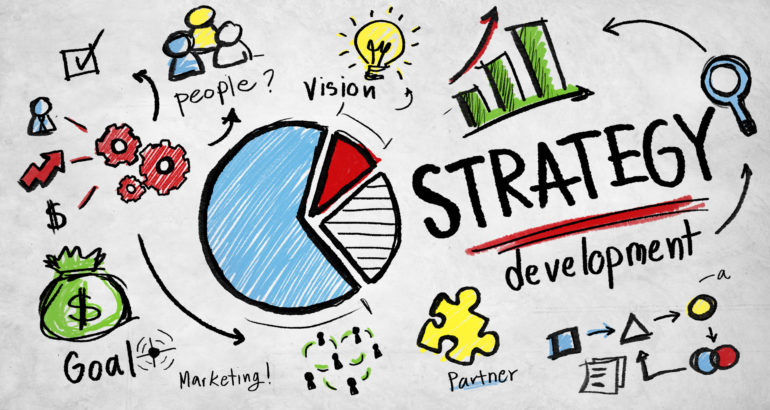

dataset avaliable in https://archive.ics.uci.edu/ml/machine-learning-databases/00222/

# Attribute Information:

Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone') 
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric) 
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric) 
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

In [3]:
dataset=pd.read_csv("Data/bank-additional-full.csv",sep = ';')

In [4]:
dataset.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


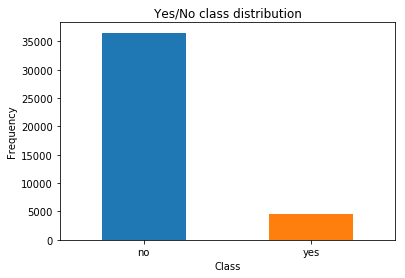

In [5]:
LABELS = ["no", "yes"]
count_classes = pd.value_counts(dataset['y'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Yes/No class distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency");

In [6]:
yes = dataset[dataset.y == 'yes']
no = dataset[dataset.y == 'no']

In [7]:
yes.shape

(4640, 21)

In [8]:
no.shape

(36548, 21)

In [9]:
dataset.isnull().values.any()

False

In [10]:
x=dataset.iloc[:,:-1].values

In [11]:
x[0]

array([56, 'housemaid', 'married', 'basic.4y', 'no', 'no', 'no',
       'telephone', 'may', 'mon', 261, 1, 999, 0, 'nonexistent', 1.1,
       93.994, -36.4, 4.857, 5191.0], dtype=object)

In [12]:
from sklearn.preprocessing import LabelEncoder
lab=LabelEncoder()
x[:,1]=lab.fit_transform(x[:,1])
x[:,2]=lab.fit_transform(x[:,2])
x[:,3]=lab.fit_transform(x[:,3])
x[:,4]=lab.fit_transform(x[:,1])
x[:,5]=lab.fit_transform(x[:,1])
x[:,6]=lab.fit_transform(x[:,1])
x[:,7]=lab.fit_transform(x[:,1])
x[:,8]=lab.fit_transform(x[:,1])
x[:,9]=lab.fit_transform(x[:,1])
x[:,14]=lab.fit_transform(x[:,1])

In [13]:
x[0]

array([56, 3, 1, 0, 3, 3, 3, 3, 3, 3, 261, 1, 999, 0, 3, 1.1, 93.994,
       -36.4, 4.857, 5191.0], dtype=object)

In [14]:
y=dataset.iloc[:,-1].values

In [15]:
y[0]

'no'

In [16]:
lab_y=LabelEncoder()
y=lab_y.fit_transform(y)

In [17]:
y[0]

0

In [18]:
from sklearn.preprocessing import StandardScaler
ssx=StandardScaler()
x=ssx.fit_transform(x)

/home/vijay/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


In [19]:
x[0]

array([ 1.53303429, -0.20157925, -0.2837415 , -1.75392459, -0.20157925,
       -0.20157925, -0.20157925, -0.20157925, -0.20157925, -0.20157925,
        0.01047142, -0.56592197,  0.1954139 , -0.34949428, -0.20157925,
        0.64809227,  0.72272247,  0.88644656,  0.71245988,  0.33167991])

In [20]:
# Splitting the dataset into the Training set and Test set
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20 , random_state = 0)

/home/vijay/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [21]:
!pip install xgboost

You are using pip version 9.0.1, however version 10.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [22]:
# Fitting XGBoost to the Training set
from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [23]:
# Predicting the Test set results
y_pred=classifier.predict(X_test)

In [24]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [25]:
cm

array([[7092,  227],
       [ 416,  503]])

In [26]:
accuracy=((cm[0][0]+cm[1][1])/(cm[0][0]+cm[1][1]+cm[0][1]+cm[1][0]))*100
print("Accuracy :"+str(accuracy))

Accuracy :92.1947074533


In [27]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)


In [28]:
print(" Mean Accuracy :{0} \n Standard deviation {1}".format(str(accuracies.mean()) ,str(accuracies.std())))

 Mean Accuracy :0.914112501621 
 Standard deviation 0.00315995113039


Below code used for fine tune the model with best parameters ,i am not having sufficient perfoemance power,so i didnt executed it,

In [ ]:
# Applying Grid Search to find the best model and the best parameters
from sklearn.model_selection import GridSearchCV
parameters = [{'max_depth'        : [3,5,7,10],
               'min_child_weight' : [1,3,5],  
               'gamma'            : [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
               'learning_rate'    : [0.001]
              }]
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_